In [4]:
#import os
#os.rmdir("/content/drive/MyDrive/corr_data_real/train_data/with_multipath/.ipynb_checkpoints")
#os.rmdir("/content/drive/MyDrive/corr_data_real/train_data/without_multipath/.ipynb_checkpoints")
#for item in train_data_root.glob('*/*'):
#  os.remove(item)
#for item in test_data_root.glob('*/*'):
#  os.remove(item)
#os.rmdir("/content/drive/MyDrive/corr_data_real/train_data/with_multipath")

In [5]:
!unzip '/content/drive/MyDrive/corr_data_real.zip' -d '/content'

流式输出内容被截断，只能显示最后 5000 行内容。
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_36.94_-15.8119_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_36.94_-9.8272_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_36.94_27.6164_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_36.94_29.3468_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_37.09_-15.7287_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_37.09_23.0131_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_37.09_25.388_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_37.14_22.6697_.png  
 extracting: /content/corr_data_real/train_data/with_multipath/with_multipath_corr_26_0_37.14_26.199

In [6]:
import tensorflow as tf 
import pathlib
import random
import IPython.display as display
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from sklearn.model_selection import train_test_split

AUTOTUNE = tf.data.experimental.AUTOTUNE

In [7]:
train_data_root=pathlib.Path('/content/corr_data_real/train_data')
test_data_root=pathlib.Path('/content/corr_data_real/test_data')
label_names = sorted(item.name for item in train_data_root.glob('*/') if item.is_dir())
label_names = label_names
label_names

['with_multipath', 'without_multipath']

In [8]:
label_to_index = dict((name, index) for index, name in enumerate(label_names))
label_to_index

{'with_multipath': 0, 'without_multipath': 1}

In [9]:
all_train_image_paths = list(train_data_root.glob('*/*'))
all_train_image_paths = [str(path) for path in all_train_image_paths]
all_test_image_paths = list(test_data_root.glob('*/*'))
all_test_image_paths = [str(path) for path in all_test_image_paths]
random.shuffle(all_train_image_paths)
random.shuffle(all_test_image_paths)

train_image_count = len(all_train_image_paths)
print(train_image_count)
test_image_count = len(all_test_image_paths)
print(test_image_count)

51417
12945


In [10]:
for n in range(3):
  image_path = random.choice(all_train_image_paths)
  display.display(display.Image(image_path))
  print(image_path)
  print()

/content/corr_data_real/train_data/with_multipath/with_multipath_corr_16_0_45.56_-10.0922_.png



/content/corr_data_real/train_data/without_multipath/without_multipath_corr_25_0_46.41_-1.4628_.png



/content/corr_data_real/train_data/without_multipath/without_multipath_corr_22_0_44.29_-2.4904_.png



In [11]:
all_train_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_train_image_paths]
all_test_image_labels = [label_to_index[pathlib.Path(path).parent.name]
                    for path in all_test_image_paths]
print("First 10 labels indices: ", all_test_image_labels[:10])
print(all_test_image_paths[:10])
# random.shuffle(all_test_image_paths)
# print(all_test_image_paths[:10])
test_image_count = len(all_test_image_paths)
print(test_image_count)

First 10 labels indices:  [0, 1, 1, 1, 1, 1, 1, 1, 1, 1]
['/content/corr_data_real/test_data/with_multipath/with_multipath_corr_29_0_44.29_5.7195_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_10_0_45.8_0.6053_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_22_0_44.29_0.4473_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_10_0_48.99_3.4008_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_22_0_42.75_0.5144_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_4_0_42.04_-1.545_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_3_0_41.07_2.2787_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_9_0_42.75_0.1071_.png', '/content/corr_data_real/test_data/without_multipath/without_multipath_corr_9_0_44.02_0.0972_.png', '/content/corr_data_real/test_data/without_m

In [12]:
all_train_image_attributes = [float(path.split('_')[9])
                    for path in all_train_image_paths]
all_test_image_attributes = [float(path.split('_')[9])
                    for path in all_test_image_paths]
print(all_train_image_attributes[:10])
print(all_test_image_attributes[:10])

all_train_cph_error = [float(path.split('_')[10])
                    for path in all_train_image_paths]
all_test_cph_error = [float(path.split('_')[10])
                    for path in all_test_image_paths]
print(all_train_cph_error[:10])
print(all_test_cph_error[:10])

#all_train_doppler_error = [float(path.split('_')[8])
#                    for path in all_train_image_paths]
#all_test_doppler_error = [float(path.split('_')[8])
#                    for path in all_test_image_paths]
#print(all_train_cph_error[:10])
#print(all_test_cph_error[:10])

[44.65, 45.66, 40.55, 48.82, 47.63, 48.93, 47.8, 48.06, 34.37, 46.73]
[44.29, 45.8, 44.29, 48.99, 42.75, 42.04, 41.07, 42.75, 44.02, 39.86]
[-1.9985, 1.3769, 0.1278, 6.1613, -3.3465, -2.2923, 4.0241, 1.2393, 1.2154, -5.1204]
[5.7195, 0.6053, 0.4473, 3.4008, 0.5144, -1.545, 2.2787, 0.1071, 0.0972, 3.5307]


In [13]:
img_path = all_train_image_paths[0]
img_raw = tf.io.read_file(img_path)
print(repr(img_raw)[:100]+"...")

<tf.Tensor: shape=(), dtype=string, numpy=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\x15\x00\...


In [14]:
img_tensor = tf.cast(tf.image.decode_image(img_raw),dtype=tf.float32)
img_tensor /= 255.0
print(img_tensor.shape)
print(img_tensor.dtype)

(1, 21, 1)
<dtype: 'float32'>


In [15]:
def preprocess_image(image):
  image = tf.cast(tf.image.decode_image(image),dtype=tf.float32)
#  image = image[8:23,7]
  image /= 255.0  # normalize to [0,1] range
  return image

In [16]:
def load_and_preprocess_image(path):
  image = tf.io.read_file(path)
  return preprocess_image(image)

In [17]:
path_train_ds = tf.data.Dataset.from_tensor_slices(all_train_image_paths)
image_train_ds = path_train_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_train_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_image_labels, tf.int64))
attributes_train_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_image_attributes, tf.float32))
cph_err_train_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_cph_error, tf.float32))
#doppler_err_train_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_train_doppler_error, tf.float32))
print(path_train_ds)
print(image_train_ds)
print(label_train_ds)
print(attributes_train_ds)
print(cph_err_train_ds)
#print(doppler_err_train_ds)
#split = train_test_split(image_train_ds, label_train_ds, test_size=0.25, random_state=42)
#(trainAttrX, testAttrX, trainImagesX, testImagesX) = split
#print(trainAttrX)#
#print(testAttrX)
#print(trainImagesX)
#print(testImagesX)
path_test_ds = tf.data.Dataset.from_tensor_slices(all_test_image_paths)
image_test_ds = path_test_ds.map(load_and_preprocess_image, num_parallel_calls=AUTOTUNE)
label_test_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_test_image_labels, tf.int64))
attributes_test_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_test_image_attributes, tf.float32))
cph_err_test_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_test_cph_error, tf.float32))
#doppler_err_test_ds = tf.data.Dataset.from_tensor_slices(tf.cast(all_test_doppler_error, tf.float32))
print(path_test_ds)
print(image_test_ds)
print(label_test_ds)
print(attributes_test_ds)
print(cph_err_test_ds)
#print(doppler_err_test_ds)

<TensorSliceDataset shapes: (), types: tf.string>
<ParallelMapDataset shapes: <unknown>, types: tf.float32>
<TensorSliceDataset shapes: (), types: tf.int64>
<TensorSliceDataset shapes: (), types: tf.float32>
<TensorSliceDataset shapes: (), types: tf.float32>
<TensorSliceDataset shapes: (), types: tf.string>
<ParallelMapDataset shapes: <unknown>, types: tf.float32>
<TensorSliceDataset shapes: (), types: tf.int64>
<TensorSliceDataset shapes: (), types: tf.float32>
<TensorSliceDataset shapes: (), types: tf.float32>


In [18]:
BATCH_SIZE = 32

image_label_train_ds = tf.data.Dataset.zip(((image_train_ds, attributes_train_ds), (cph_err_train_ds, label_train_ds)))
image_label_test_ds = tf.data.Dataset.zip(((image_test_ds, attributes_test_ds), (cph_err_test_ds, label_test_ds)))

train_ds = image_label_train_ds.apply(
  tf.data.experimental.shuffle_and_repeat(buffer_size=train_image_count))
train_ds = train_ds.batch(BATCH_SIZE)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
print(train_ds)

test_ds = image_label_test_ds
#test_ds = image_label_test_ds.shuffle(buffer_size=test_image_count)
test_ds = test_ds.batch(BATCH_SIZE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)
print(test_ds)

Instructions for updating:
Use `tf.data.Dataset.shuffle(buffer_size, seed)` followed by `tf.data.Dataset.repeat(count)`. Static tf.data optimizations will take care of using the fused implementation.
<PrefetchDataset shapes: ((<unknown>, (None,)), ((None,), (None,))), types: ((tf.float32, tf.float32), (tf.float32, tf.int64))>
<PrefetchDataset shapes: ((<unknown>, (None,)), ((None,), (None,))), types: ((tf.float32, tf.float32), (tf.float32, tf.int64))>


In [ ]:
#plt.figure(figsize=(8,8))
for n, image in enumerate(image_train_ds.take(16)):
  plt.subplot(4,4,n+1)
  plt.imshow(tf.squeeze(image),'gray')
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(all_train_image_paths[n])
  plt.show()

In [19]:
input0 = layers.Input((1, 21, 1), dtype='float32', name='input0' )
x = layers.Flatten()(input0)
input1 = layers.Input((1,), dtype='float32', name='input1' )

In [20]:
combinedInput = tf.keras.layers.concatenate([x, input1])
y1 = tf.keras.layers.Dense(16, activation="relu")(combinedInput)
y2 = tf.keras.layers.Dense(16, activation="relu")(combinedInput)
#y3 = tf.keras.layers.Dense(8, activation="relu")(combinedInput)
#combinedInput1 = tf.keras.layers.concatenate([y1, y2])
#combinedInput2 = tf.keras.layers.concatenate([y2, y3])
#combinedInput3 = tf.keras.layers.concatenate([y1, y2])
#y = tf.keras.layers.Dense(10, activation="relu")(y)
z0 = tf.keras.layers.Dense(1)(y1)
#z1 = tf.keras.layers.Dense(1)(y1)
z2 = tf.keras.layers.Dense(2)(y2)
model = tf.keras.models.Model(inputs=[input0, input1], outputs=[z0,z2])
#z = tf.keras.layers.Dense(2, activation="relu")(y0)
#model = tf.keras.models.Model(inputs=input0, outputs=z)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input0 (InputLayer)             [(None, 1, 21, 1)]   0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 21)           0           input0[0][0]                     
__________________________________________________________________________________________________
input1 (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 22)           0           flatten[0][0]                    
                                                                 input1[0][0]                 

In [24]:
model.compile(optimizer='adam',
              loss=[tf.keras.losses.MeanSquaredError(),
                    tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)],
              loss_weights=[1.0, 0.001],
              metrics=['accuracy'])
history = model.fit(train_ds, epochs=10, steps_per_epoch=1000, batch_size=BATCH_SIZE, validation_data=(test_ds))

Epoch 1/10
1000/1000 [==============================] - 23s 13ms/step - loss: 57.1170 - dense_2_loss: 57.1165 - dense_3_loss: 0.4635 - dense_2_accuracy: 0.0000e+00 - dense_3_accuracy: 0.8155 - val_loss: 57.6029 - val_dense_2_loss: 57.6024 - val_dense_3_loss: 0.4819 - val_dense_2_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.7978
Epoch 2/10
1000/1000 [==============================] - 13s 13ms/step - loss: 58.5978 - dense_2_loss: 58.5973 - dense_3_loss: 0.4650 - dense_2_accuracy: 3.1250e-05 - dense_3_accuracy: 0.8152 - val_loss: 57.5828 - val_dense_2_loss: 57.5823 - val_dense_3_loss: 0.4703 - val_dense_2_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.8051
Epoch 3/10
1000/1000 [==============================] - 12s 12ms/step - loss: 58.1115 - dense_2_loss: 58.1110 - dense_3_loss: 0.4577 - dense_2_accuracy: 0.0000e+00 - dense_3_accuracy: 0.8188 - val_loss: 57.5026 - val_dense_2_loss: 57.5022 - val_dense_3_loss: 0.4684 - val_dense_2_accuracy: 0.0000e+00 - val_dense_3_accuracy: 0.8174
Epoc

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

test_loss, test_acc = model.evaluate(test_ds, verbose=2)

KeyError: ignored

In [25]:
model.save('model_real1.h5')

In [27]:
from google.colab import files
 
files.download('/content/drive/MyDrive/model_real1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/model_real1.h5')

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input0 (InputLayer)             [(None, 1, 21, 1)]   0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 21)           0           input0[0][0]                     
__________________________________________________________________________________________________
input1 (InputLayer)             [(None, 1)]          0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 22)           0           flatten[0][0]                    
                                                                 input1[0][0]                 

In [ ]:
temp = iter(test_ds.as_numpy_iterator())
k = 0;

Predictions:
 [ 0.04731052  0.03246276 -0.11947329 -0.03736193 -0.09394868  0.20595138
  0.26675528 -0.015714    0.08474748  0.12698142  0.19223897 -0.21060784
 -0.16755421  0.15587632 -0.10179837 -0.13458522  0.0446202  -0.12469848
 -0.16526492  0.12105577 -0.23136838  0.0487458  -0.10092576 -0.10941203
 -0.12901957  0.12011354  0.20162265 -0.09093221  0.07646339  0.15414922
  0.09204786  0.12565868]
Labels:
 [ 0.026646  0.054304 -0.15546  -0.031388 -0.057922  0.23405   0.2491
 -0.01944   0.12459   0.16629   0.22942  -0.21032  -0.14859   0.17093
 -0.069164 -0.10411   0.065348 -0.099744 -0.15934   0.11538  -0.21906
  0.10608  -0.10395  -0.062356 -0.10249   0.13502   0.24116  -0.060293
  0.087292  0.18555   0.10528   0.13225 ]


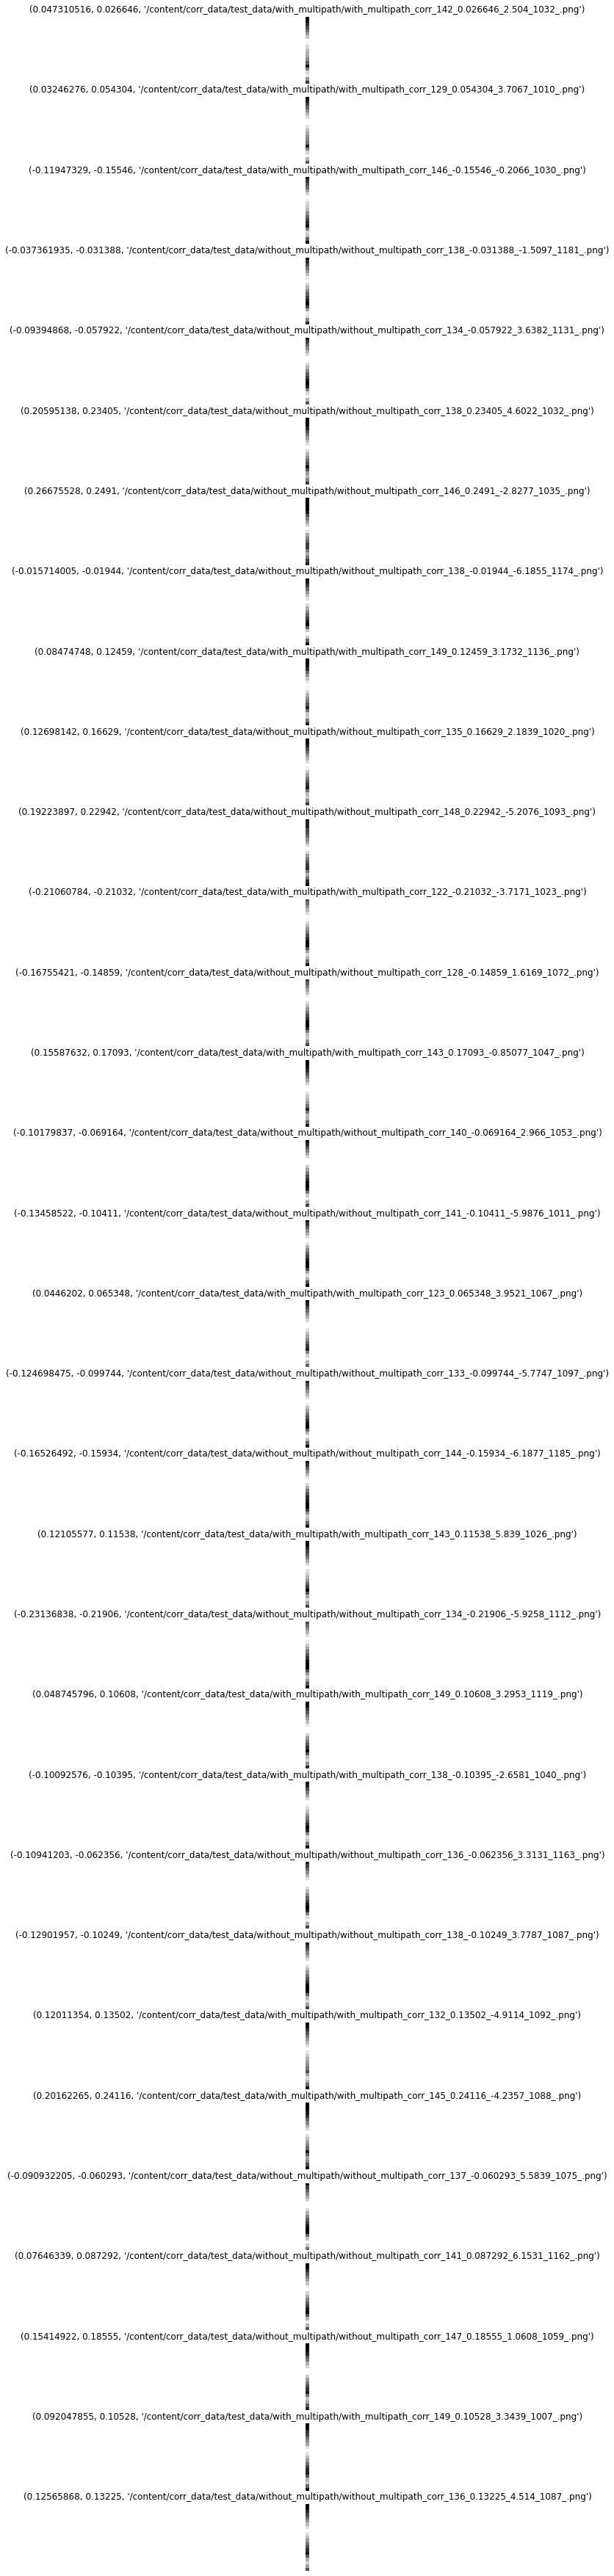

In [ ]:
#Retrieve a batch of images from the test set

image_batch, label_batch = temp.next()
predictions = model.predict_on_batch(image_batch).flatten()
# print(predictions)
# print(predictions[0:2*BATCH_SIZE:2])
# print(predictions[1:2*BATCH_SIZE:2])
# Apply a sigmoid since our model returns logits
# predictions = tf.nn.sigmoid(predictions)
# predictions = tf.where(predictions[0:2*BATCH_SIZE:2] > predictions[1:2*BATCH_SIZE:2], 0, 1)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 2*BATCH_SIZE))
for i in range(BATCH_SIZE):
  ax = plt.subplot(BATCH_SIZE, 1, i + 1)
  plt.imshow(image_batch[0][i],'gray')
  plt.title((predictions[i], label_batch[i], all_test_image_paths[i+k]))
  plt.axis("off")
k += BATCH_SIZE